**About the dataset** - The dataset is relatively simple. We are provided with comma separated values of name of the country, the continent it lies in, its total sugarcane production, production_per_person and Yield (Kg produced/area of land). 

**Goal** - The Goal of this note is to analyze the data and conclude any valuable insights that may be suggestive from the data. The data was obtained from https://www.atlasbig.com/en-in/countries-by-sugarcane-production 

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colormaps

In [2]:
data = pd.read_csv('List of Countries by Sugarcane Production.csv')

In [3]:
data.sample(5)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
10,10,Indonesia,Asia,27.158.830,10248,472.693,"57.455,5"
38,38,Madagascar,Africa,3.005.641,114445,94.157,"31.921,6"
51,51,Jamaica,North America,1.422.432,521254,26.255,"54.178,2"
101,101,Samoa,Oceania,12,6,1,"11.949,8"
70,70,Burundi,Africa,218.115,2042,2.998,"72.753,5"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


# Cleaning the data

0. The column-names can be better - converted into snake/camel case so that variables are named properly. 
1. We see that production has superfluous decimals and Acerage, Yield also have some problems.
2. They are all in string format right now, which we should convert into int64 for data-analysis. 
3. Unnamed: 0 is a superfluous column that is not needed either - so we will drop this column.
4. We will also check for null-values, fill it if reasonable, otherwise drop it. 

In [5]:
data = data.drop('Unnamed: 0', axis = 1) # drop the column named 'Unnamed: 0'

In [6]:
data.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [7]:
data.rename(columns = {'Production per Person (Kg)' : 'Production_per_person (Kg)',
                      'Yield (Kg / Hectare)' : 'Yield (Kg/Hectare)'}, inplace = True) # renaming the column that

#has more than one word in its name

In [8]:
data.head()

,Country,Continent,Production (Tons),Production_per_person (Kg),Acreage (Hectare),Yield (Kg/Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [9]:
# Adjusting the eventually float data (currently in string format) to remove decimals and commas

In [10]:
data["Production (Tons)"] = data["Production (Tons)"].str.replace(".","")
data['Production_per_person (Kg)'] = data['Production_per_person (Kg)'].str.replace('.', '').str.replace(',', '')
data['Acreage (Hectare)'] = data['Acreage (Hectare)'].str.replace('.', '')
data['Yield (Kg/Hectare)'] = data['Yield (Kg/Hectare)'].str.replace('.', '').str.replace(',', '')

In [11]:
data.head()

,Country,Continent,Production (Tons),Production_per_person (Kg),Acreage (Hectare),Yield (Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,751675
1,India,Asia,348448000,260721,4950000,703935
2,China,Asia,123059739,88287,1675215,734591
3,Thailand,Asia,87468496,1264303,1336575,654422
4,Pakistan,Asia,65450704,324219,1130820,57879


In [12]:
# checking for null-entries
data.isnull().sum()

Country                       0
Continent                     0
Production (Tons)             0
Production_per_person (Kg)    0
Acreage (Hectare)             1
Yield (Kg/Hectare)            1
dtype: int64

In [13]:
# finding the null-entries
data [data['Acreage (Hectare)'].isnull()]

,Country,Continent,Production (Tons),Production_per_person (Kg),Acreage (Hectare),Yield (Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [14]:
# Since the data is null on the same row and the missing data is extremely country specific, we choose not to impute or 
# interpolate the missing entry. Since the entry is missing only in one row, we can drop it

data = data.dropna().reset_index().drop("index", axis = 1)

In [15]:
data.isnull().sum() # confirming that the data has no missing entries anymore

Country                       0
Continent                     0
Production (Tons)             0
Production_per_person (Kg)    0
Acreage (Hectare)             0
Yield (Kg/Hectare)            0
dtype: int64

In [16]:
# now we will cast the numerical data into their respective types, to prepare for analysis

data['Production (Tons)'] = data['Production (Tons)'].astype(float)
data['Production_per_person (Kg)'] = data['Production_per_person (Kg)'].astype(float)
data['Acreage (Hectare)'] = data['Acreage (Hectare)'].astype(float)
data['Yield (Kg/Hectare)'] = data['Yield (Kg/Hectare)'].astype(float)

In [17]:
data.head()

,Country,Continent,Production (Tons),Production_per_person (Kg),Acreage (Hectare),Yield (Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


In [18]:
data.dtypes # Confirming that the numeric data-types have been adjusted to float64

Country                        object
Continent                      object
Production (Tons)             float64
Production_per_person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg/Hectare)            float64
dtype: object

# Single-Variable Data Analysis

In [19]:
continent_wise_entries = data['Continent'].value_counts() # How many countries are recorded from each continent?

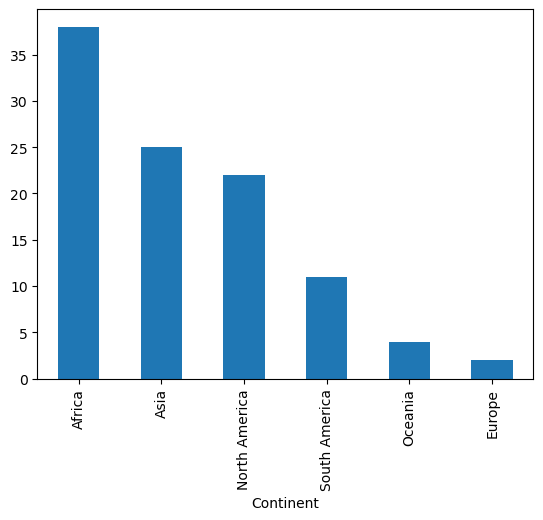

In [20]:
continent_wise_entries.plot(kind = 'bar')
plt.show()

# From above, Africa seem to be the continent with maximum countries that
# produce SUGARCANE

In [21]:
# A cursory look at the numeric data, with mean, quartiles etc.

data.describe()

,Production (Tons),Production_per_person (Kg),Acreage (Hectare),Yield (Kg/Hectare)
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,1.850372e+07,4.124805e+05,2.498981e+05,5.018502e+05
std,8.419149e+07,8.669140e+05,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,6.251875e+04,1.075225e+04,1.104000e+03,2.487505e+05
50%,1.440044e+06,8.135850e+04,1.655800e+04,5.102500e+05
75%,6.426824e+06,2.828128e+05,8.047400e+04,7.198920e+05
max,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


# Checking for outliers, although they are expected in this data, since some countries will produce more than others, due to larger land mass, weather variations, government policies etc.

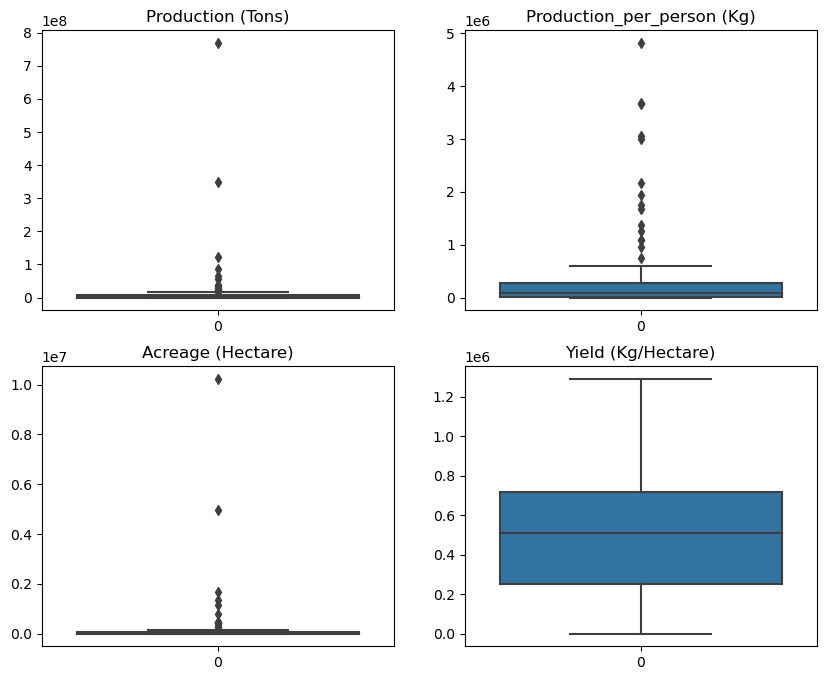

In [22]:
plt.figure(figsize = (10,8))


plt.subplot(2,2,1)
sns.boxplot(data["Production (Tons)"])
plt.title("Production (Tons)")

plt.subplot(2,2,2)
sns.boxplot(data["Production_per_person (Kg)"])
plt.title("Production_per_person (Kg)")

plt.subplot(2,2,3)
sns.boxplot(data["Acreage (Hectare)"])
plt.title("Acreage (Hectare)")

plt.subplot(2,2,4)
sns.boxplot(data["Yield (Kg/Hectare)"])
plt.title("Yield (Kg/Hectare)")
plt.show()

# Which countries are the largest producers of Sugarcane?

In [23]:
new_countrywise_data = df_new = data[["Country","Production (Tons)"]].set_index("Country") # retabulating countrywise production

#with countries as the respective index

<Axes: ylabel='Production (Tons)'>

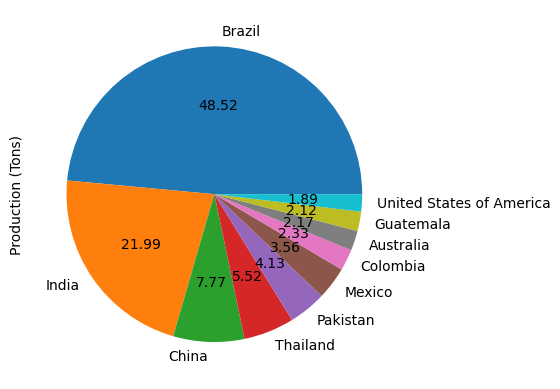

In [24]:
new_countrywise_data['Production (Tons)'].head(10).plot(kind = 'pie', autopct = '%.2f') # plotting the top 10 countrywise 

# production (in Tons) in a pie-chart

In [25]:
new_countrywise_data_sorted = new_countrywise_data.sort_values('Production (Tons)', ascending = False) 

# on the other hand, we can sort the new_countrywise_data and then plot it, as in the next line

<Axes: xlabel='Country'>

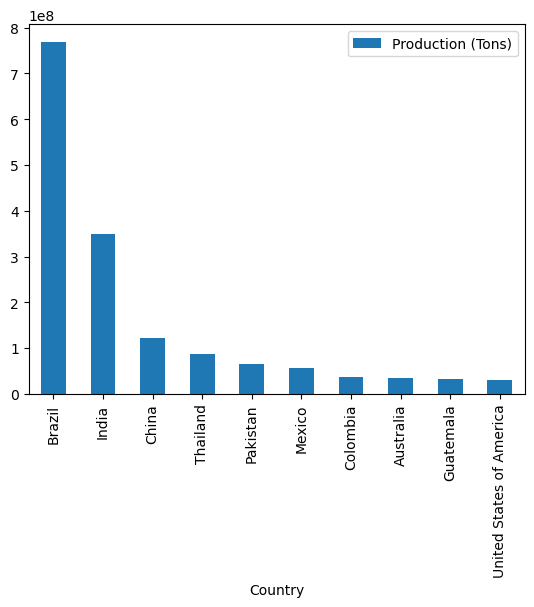

In [26]:
new_countrywise_data_sorted.head(10).plot(kind = 'bar')

# A different barplot using the seaborn library

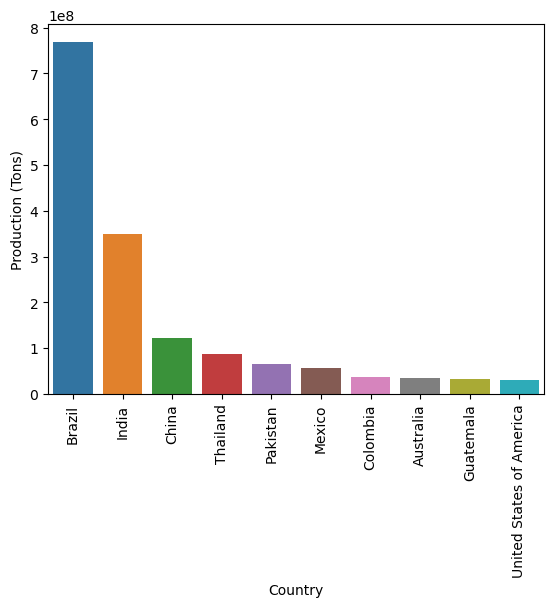

In [28]:
# The country names are written horizontally and get mashed together. So, we will rotate their name by 90 degrees for visibility

fig = sns.barplot(data = data.head(10), x = 'Country', y = 'Production (Tons)')
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
plt.show()

# Which country has highest yield per hectare? 

In [29]:
data_sorted_by_yield = data.sort_values('Yield (Kg/Hectare)', ascending = False)

In [30]:
row_with_highest_yield = data_sorted_by_yield.iloc[0:1 , 0:]

In [31]:
row_with_highest_yield

,Country,Continent,Production (Tons),Production_per_person (Kg),Acreage (Hectare),Yield (Kg/Hectare)
8,Guatemala,North America,33533403.0,1938114.0,25985.0,1290493.0


# Following is a bar-plot to show countries with top-10 highest yield

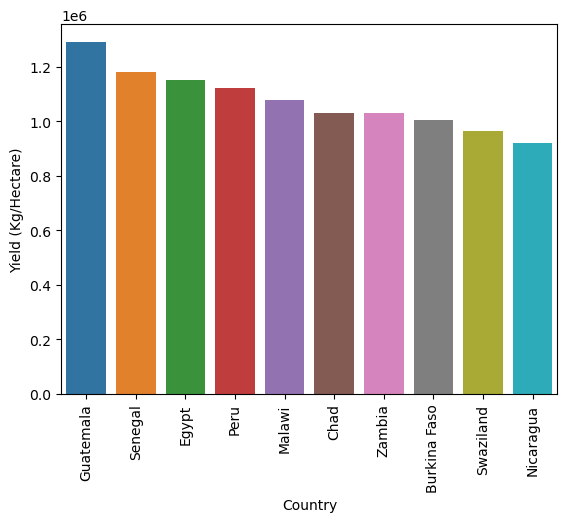

In [32]:
fig = sns.barplot(data = data_sorted_by_yield.head(10), x = 'Country', y = 'Yield (Kg/Hectare)')
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
plt.show()

# These countries seem smaller as compared to Brazil, India, China etc. Therefore, we can ask another question

# What are the countries with largest acreage? 

In [33]:
data_sorted_by_acreage = data.sort_values('Acreage (Hectare)', ascending = False)

# Following shows that the larger countries are not very efficient at producing sugarcane

In [34]:
data_sorted_by_acreage.iloc[0:10, :]

,Country,Continent,Production (Tons),Production_per_person (Kg),Acreage (Hectare),Yield (Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0
10,Indonesia,Asia,27158830.0,10248.0,472693.0,574555.0
7,Australia,Oceania,34403004.0,1373406.0,447204.0,769291.0
13,Cuba,North America,18890972.0,1683528.0,442307.0,427101.0
6,Colombia,South America,36951213.0,740075.0,416626.0,886915.0


# Following is a barplot for the Acreage (in Hectare) for top-10 countries

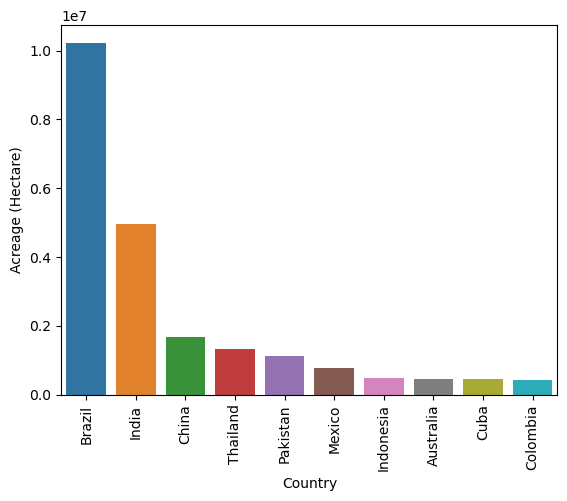

In [35]:
fig = sns.barplot(data = data_sorted_by_acreage.head(10), x = 'Country', y = 'Acreage (Hectare)')
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
plt.show()

# Do the countries with highest acreage necessarily have most production?


In [36]:
data_sorted_by_production = data.sort_values('Production (Tons)', ascending = False)

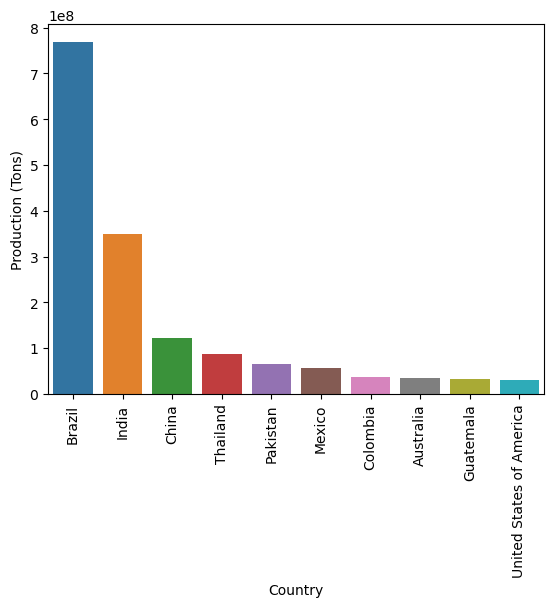

In [37]:
fig = sns.barplot(data = data_sorted_by_production.head(10), x = 'Country', y = 'Production (Tons)')
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
plt.show()

# It is worth to see correlation between Production, Acreage, Yield and Production_per_person

In [38]:
data.head(1)

,Country,Continent,Production (Tons),Production_per_person (Kg),Acreage (Hectare),Yield (Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0


In [39]:
numeric_data_only = data.iloc[:, 2:] # isolating numeric data

In [40]:
numeric_data_only.corr() # their correlation is show below

,Production (Tons),Production_per_person (Kg),Acreage (Hectare),Yield (Kg/Hectare)
Production (Tons),1.000000,0.352369,0.997550,0.121125
Production_per_person (Kg),0.352369,1.000000,0.341974,0.226719
Acreage (Hectare),0.997550,0.341974,1.000000,0.107826
Yield (Kg/Hectare),0.121125,0.226719,0.107826,1.000000


<Axes: >

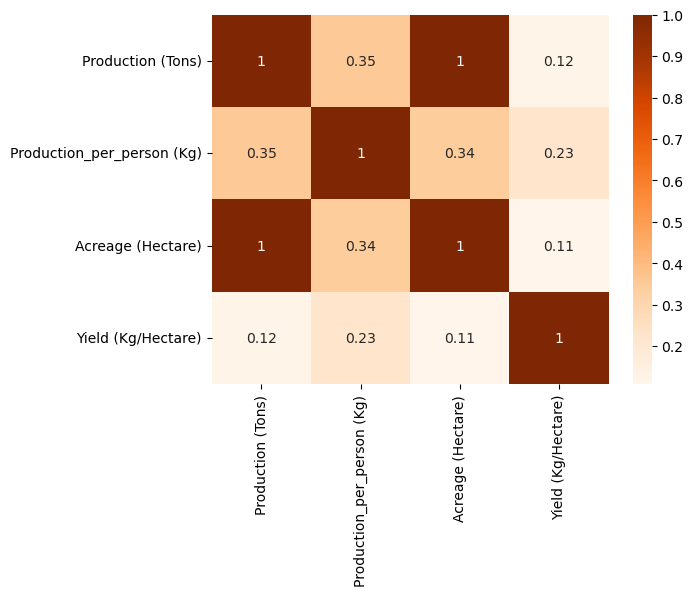

In [42]:
# One can see from above that Total_production and Acreage have a STRONG correlation, whereas Yield and Acreage have WEAK
#correlation. These relations are better demonstrated through the following heat_map

sns.heatmap(numeric_data_only.corr(), annot = True, cmap = 'Oranges')

# Conclusions

1. The data was collected and required quite a bit of preprocessing and cleaning, which makes sense since the various columns for several countries are neither complete nor provided. 

2. Continentwise Analysis shows that Africa and Asia are clearly two biggest producers of sugarcane (by Kg) and North America is on the third position. 

3. Brazil and India were the two countries with largest acreage of land on which sugarcane farming was done (by a big margin to the third). Therefore, they produced the largest share of sugarcane production with 48.5% and 22% for Brazil and India respectively. 

4. However, an interesting trend was observed while studying Yield, which is sugarcane produced per unit area (in acres) of land. The data supports the inference that the larger countries are not very efficient in producing the most yield. 

5. Brazil and India were low on the yield table whereas Guatemala, Senegal and Egypt were the countries producing sugarcane with most efficiency (as per yield).

6. All of the above information, inferences and results were communicated through appropriate visualizations (piechart, barplot, graphs etc.)